/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: U

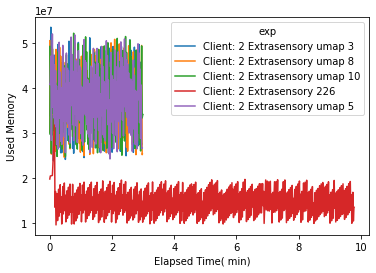

<Figure size 432x288 with 0 Axes>

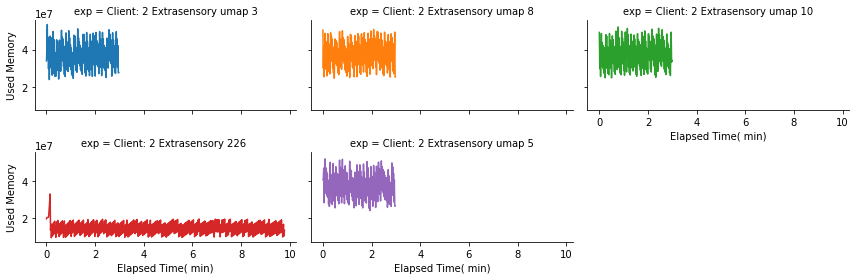

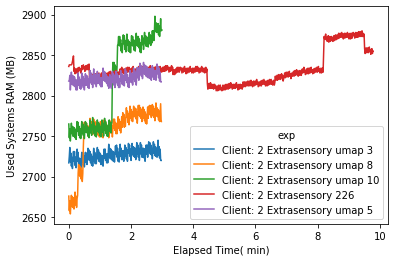

<Figure size 432x288 with 0 Axes>

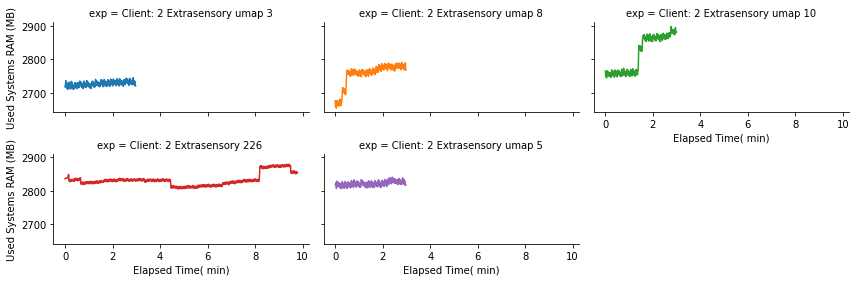

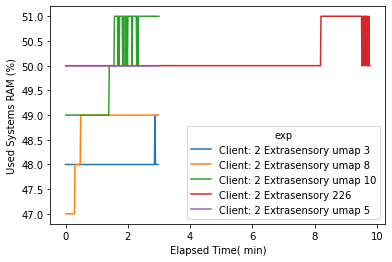

<Figure size 432x288 with 0 Axes>

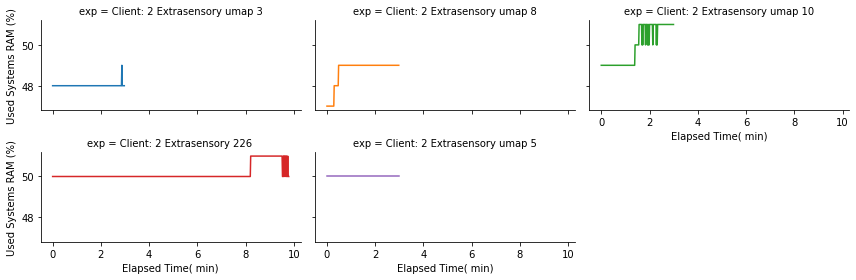

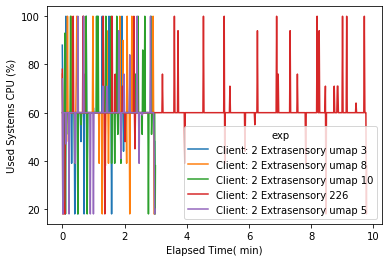

<Figure size 432x288 with 0 Axes>

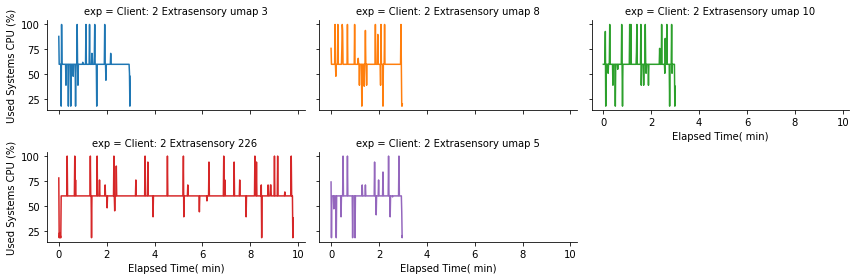

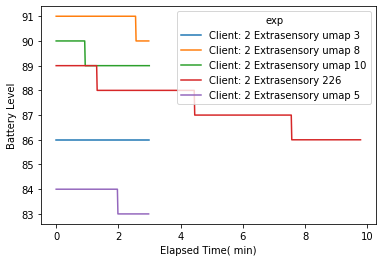

<Figure size 432x288 with 0 Axes>

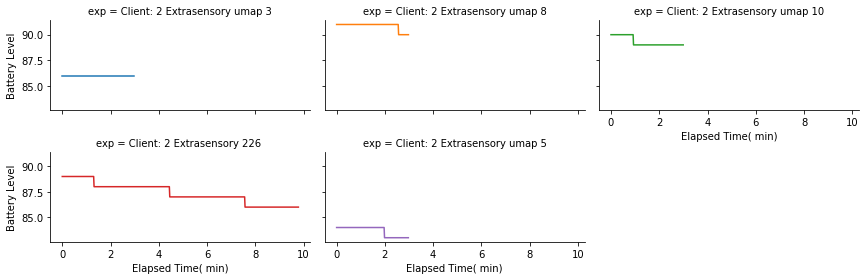

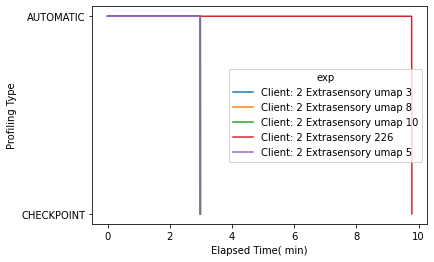

<Figure size 432x288 with 0 Axes>

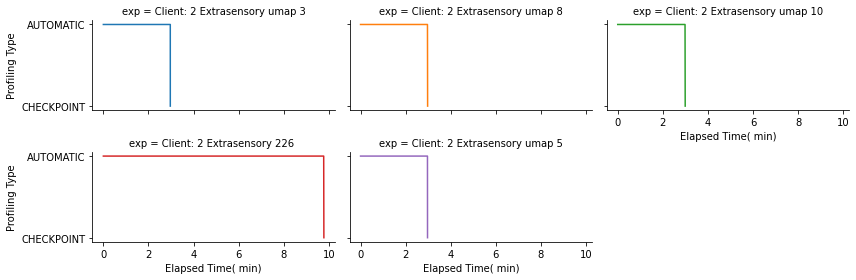

<Figure size 432x288 with 0 Axes>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob


exps=glob.glob("Extrasensory/client1/profiling/*.csv")
client="2"
def get_training_exp(fileName):  
    df = pd.read_csv(fileName,sep=';')    
    return df

frame_training=[]
for exp in exps:
    df=get_training_exp(exp) 
    dataset=exp.split("_")[1] 
    embedding=exp.split("_")[2] 
    if(embedding=="umap"):
        umap=exp.split("_")[3]
    else:
        umap=""
    if(embedding=="extrasensory"):
        embedding="226"   
    df['exp'] ="Client: "+client + " "+dataset+ ' ' + embedding + ' ' + umap
    frame_training.append(df.values) 
frs=np.concatenate((frame_training), axis=0)
df_all_training =pd.DataFrame(data=frs)   
df_all_training.columns = ["Timestamp","Elapsed Time","Used Memory","Used Systems RAM (MB)","Used Systems RAM (%)","Used Systems CPU (%)","Battery Level","Profiling Type","exp"]
def valuation_formula(x):
    return float(x.split(":")[1])  +float(x.split(":")[2])/60

df_all_training['Elapsed Time( min)'] = df_all_training.apply(lambda row: valuation_formula(row['Elapsed Time']), axis=1)



plot_trainings = ["Used Memory","Used Systems RAM (MB)","Used Systems RAM (%)","Used Systems CPU (%)","Battery Level","Profiling Type"]

for plot_training in plot_trainings:
  test =plot_training

  sns.lineplot(
      data=df_all_training, x="Elapsed Time( min)", y=test,
      hue="exp",ci=None,
      legend="full"
  )
  plt.figure()

  g = sns.FacetGrid(df_all_training, col='exp',hue="exp",size=2,aspect=2, height=15,col_wrap=3)

  g = g.map(sns.lineplot, 'Elapsed Time( min)', test, ci=None)

  plt.figure()




  


Text(0.5, 1.0, 'cliente 2 -> Tempo de treinamento para cada emebeding')

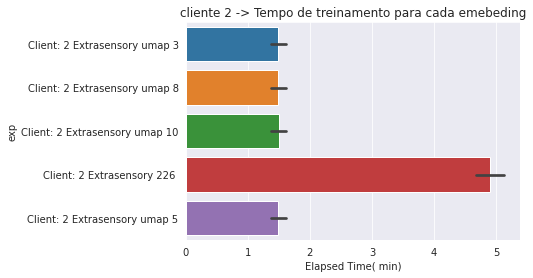

In [2]:
plt.figure()
sns.set_style('darkgrid')

sns.barplot(
      data=df_all_training, y="exp", x='Elapsed Time( min)'
  )
plt.title('cliente 2 -> Tempo de treinamento para cada emebeding')